In [0]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.autograd import Variable
from matplotlib import pyplot as plt

In [0]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [0]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [0]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae = AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0416
epoch [2/10], loss:0.0288
epoch [3/10], loss:0.0237
epoch [4/10], loss:0.0213
epoch [5/10], loss:0.0194
epoch [6/10], loss:0.0180
epoch [7/10], loss:0.0173
epoch [8/10], loss:0.0168
epoch [9/10], loss:0.0165
epoch [10/10], loss:0.0159


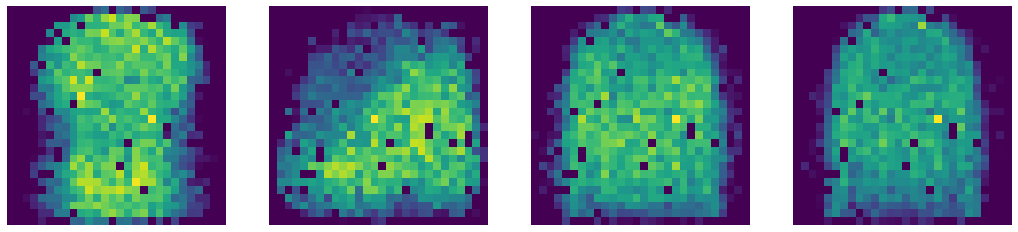

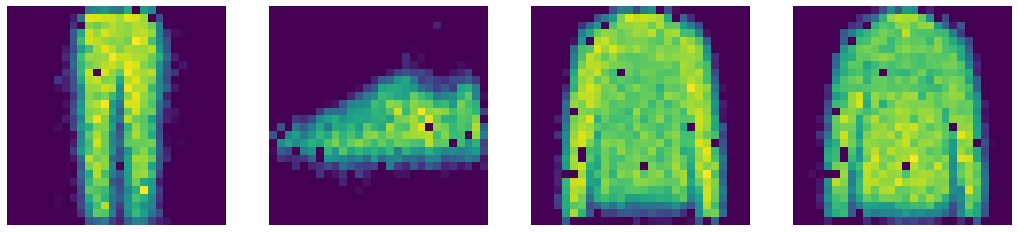

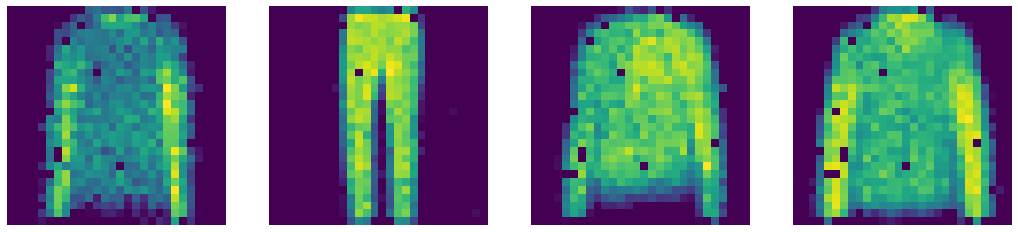

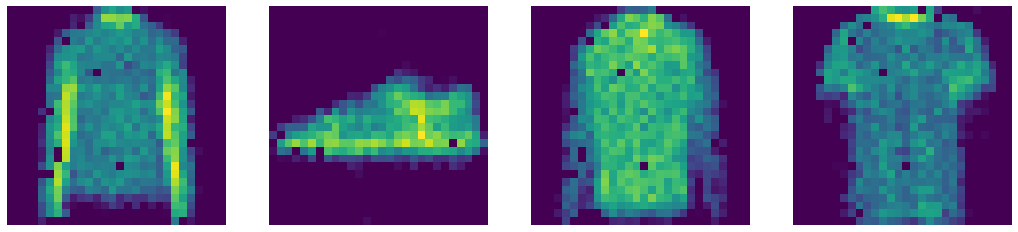

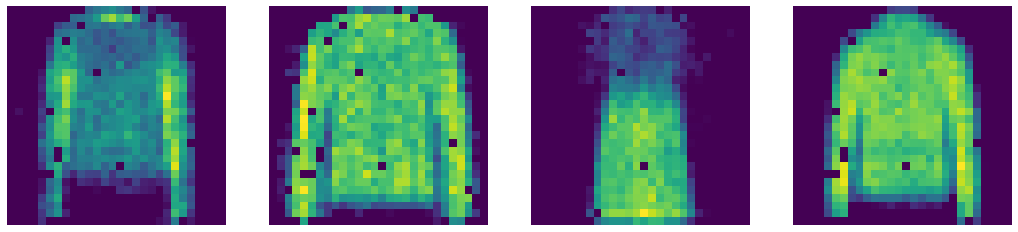

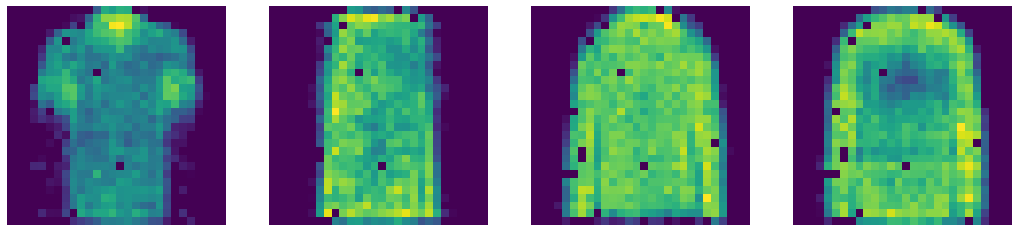

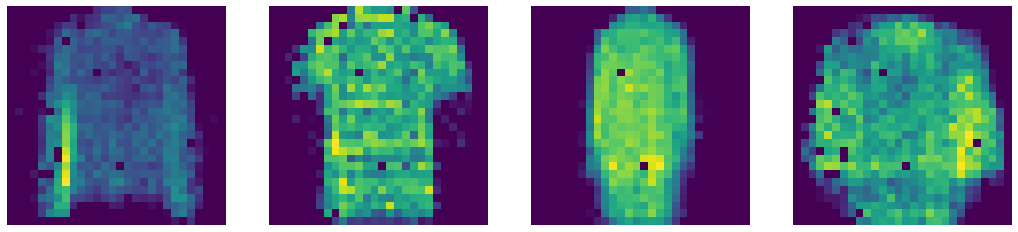

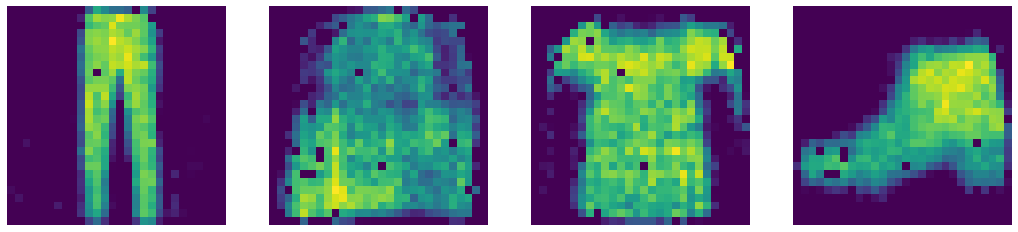

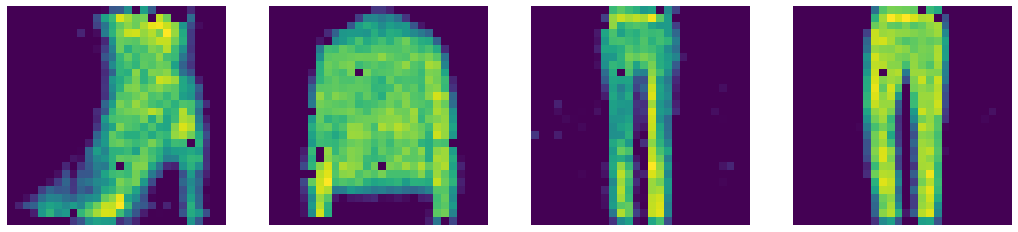

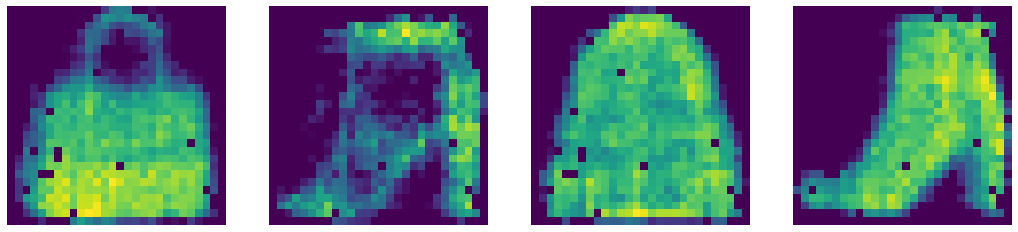

In [0]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

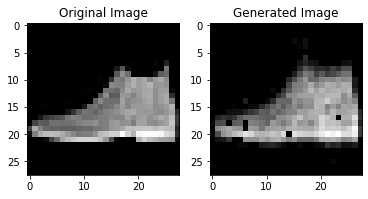

In [0]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

In [0]:
def cal_conv(input_size, stride, filter_size, padding=0):
  return (input_size+2*padding-filter_size)//stride + 1

In [0]:
cal_conv(13, 1, 3, padding=0)

11

In [0]:
class ConvAutoEncoder(nn.Module):
  def __init__(self):
    super(ConvAutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=0),
      nn.LeakyReLU(),
      nn.AvgPool2d(2),
      nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=0),
      nn.LeakyReLU()
      )

    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
      nn.Upsample(size=(26, 26), mode='bilinear', align_corners=True),
      nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=0)
      )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [0]:
model_convae = ConvAutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_convae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0241
epoch [2/10], loss:0.0196
epoch [3/10], loss:0.0175
epoch [4/10], loss:0.0144
epoch [5/10], loss:0.0125
epoch [6/10], loss:0.0121
epoch [7/10], loss:0.0121
epoch [8/10], loss:0.0115
epoch [9/10], loss:0.0114
epoch [10/10], loss:0.0123


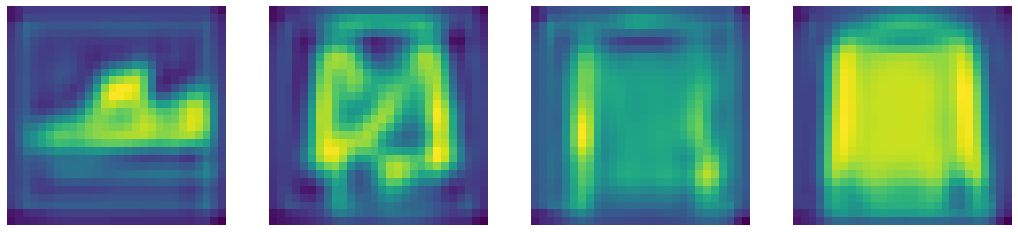

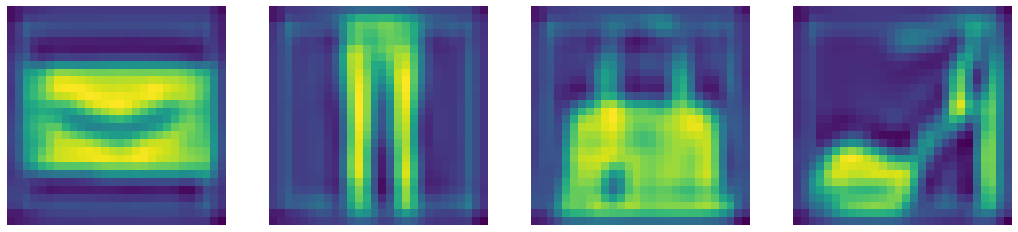

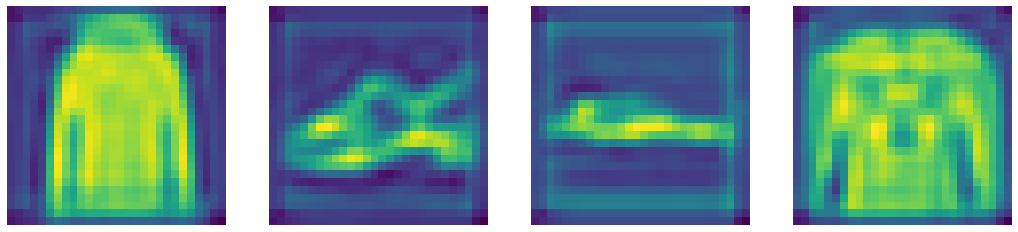

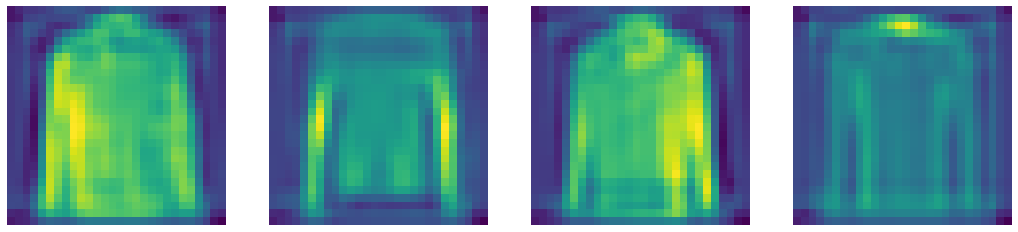

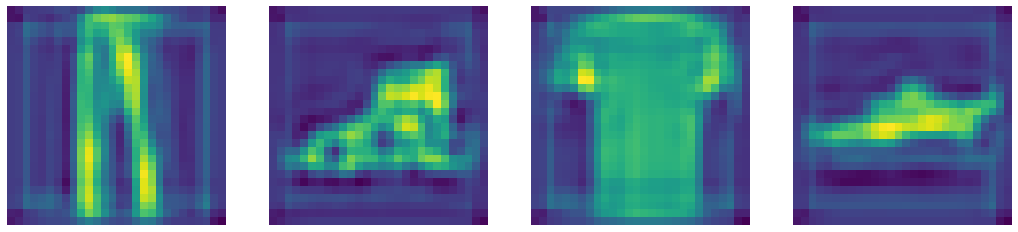

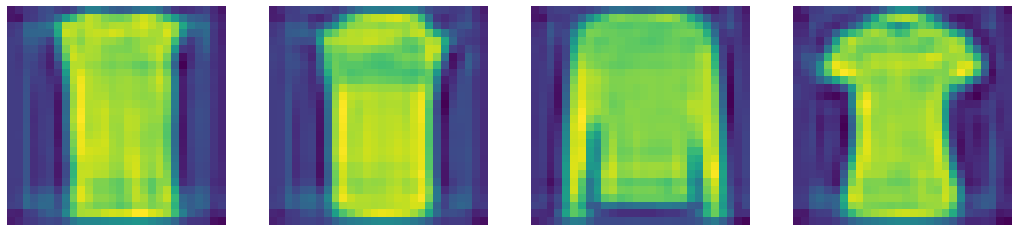

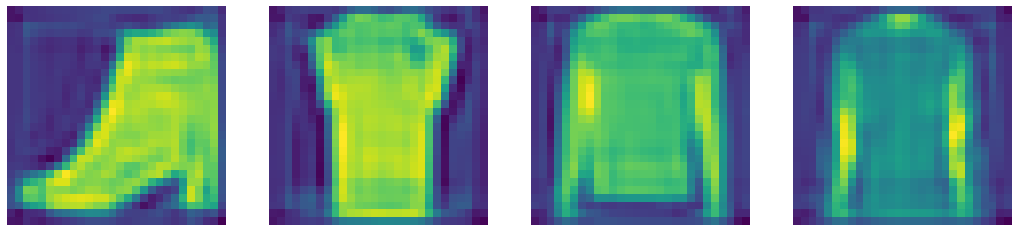

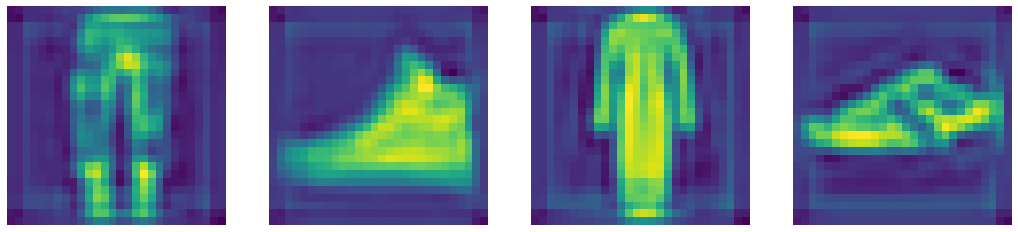

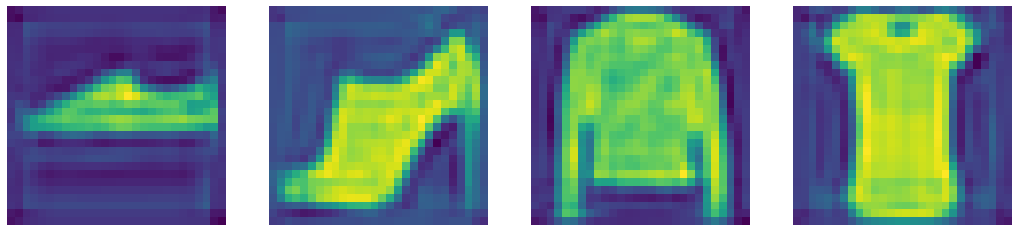

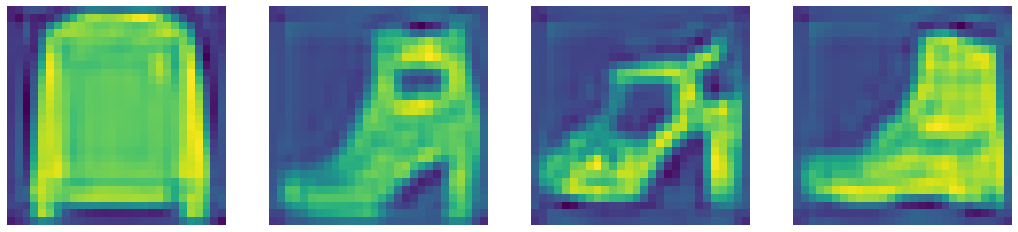

In [0]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        # img.requires_grad_()
        # img = img.view(img.size(0), -1)
        output = model_convae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

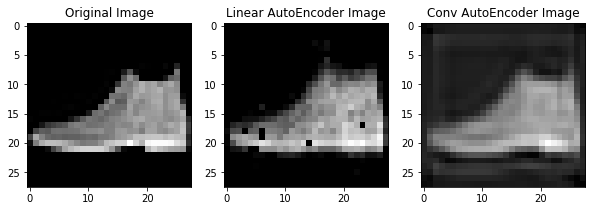

In [0]:
test_images, labels = next(iter(testloader))

test_image = Variable(test_images.view(test_images.size()[0], -1))
test_output_linear = model_ae(test_image)
test_output_conv = model_convae(test_images)
  
inp = test_images.view(-1, 28, 28)
out_linear = test_output_linear.view(-1, 28, 28)
out_conv = test_output_conv.view(-1, 28, 28)

fig.tight_layout(pad=10)
fig = plt.figure(figsize=(10, 50), )

plot = fig.add_subplot(1, 3, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 3, 2)
plot.set_title('Linear AutoEncoder Image')
imgplot = plt.imshow(out_linear[0].cpu().detach(), cmap='gray')

plot = fig.add_subplot(1, 3, 3)
plot.set_title('Conv AutoEncoder Image')
imgplot = plt.imshow(out_conv[0].cpu().detach(), cmap='gray')
plt.show()

**Linear vs Convolution AutoEncoder**

1. Convolution AutoEncoder has smoother representations than Linear AutoEncoder
2. There were not patches observed for convolution autoencoder, patches/artifacts observed for autoencoders

In [0]:
def conv_calc(size, padding, filter_, stride):
  return (size + 2*padding - filter_)/stride + 1

In [0]:
conv_calc(size=26, padding=0, filter_=3, stride=1)

24.0

**Variational AutoEncoder**

In [0]:
class VarAutoEncoder(nn.Module):
  def __init__(self, z_layer = 3200):
    super(VarAutoEncoder, self).__init__()
    self.z_layer = z_layer
    self.encoder = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=2, padding=0),
      nn.ELU(),
      nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=0),
      nn.ELU(),
      )
    
    self.linear1 = nn.Linear(in_features=(10*10*32), out_features=self.z_layer, bias=True)
    self.linear2 = nn.Linear(in_features=(10*10*32), out_features=self.z_layer, bias=True)
     
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
      nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=5, stride=2, padding=0),
      nn.Upsample(size=(28, 28), mode='nearest'),
      nn.Sigmoid()
      )

  def reparameterize(self, mu, logvar):
      std = torch.exp(0.5*logvar)
      eps = torch.randn_like(std)
      return mu + eps*std
    
  def forward(self, x):
    x = self.encoder(x)
    mu = self.linear1(x.view(-1, 10*10*32))
    sigma = self.linear2(x.view(-1, 10*10*32))

    z = self.reparameterize(mu, sigma)
    x = self.decoder(z.view(-1, 32, 10, 10))

    return x, mu, sigma

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_vae = VarAutoEncoder().to(device)

In [0]:
#list(model_vae.parameters())

In [0]:
# Configure the optimizer and criterion
learning_rate = 1e-4

optimizer = torch.optim.Adam(model_vae.parameters(), lr=learning_rate)

In [0]:
def loss_fun(x, x_bar, mu, logvar):
    BCE_loss = nn.BCELoss(reduction='sum')(x_bar, x)
    KLD = - 0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE_loss + 3*KLD

epoch [1/20], loss:583393.6875
epoch [2/20], loss:581432.0000
epoch [3/20], loss:580927.6250
epoch [4/20], loss:580875.1875
epoch [5/20], loss:580926.6875
epoch [6/20], loss:580906.5625
epoch [7/20], loss:580659.1875
epoch [8/20], loss:580759.1250
epoch [9/20], loss:579934.1875
epoch [10/20], loss:580495.6875
epoch [11/20], loss:580741.1875
epoch [12/20], loss:580626.5625
epoch [13/20], loss:580034.9375
epoch [14/20], loss:580288.6250
epoch [15/20], loss:580308.7500
epoch [16/20], loss:580659.8750
epoch [17/20], loss:580499.1250
epoch [18/20], loss:580133.3750
epoch [19/20], loss:580388.5000
epoch [20/20], loss:580376.5625


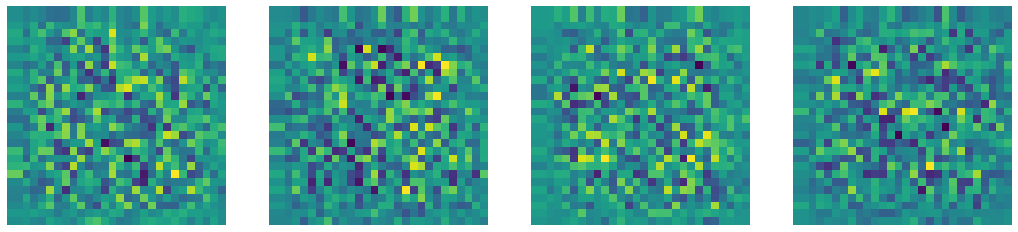

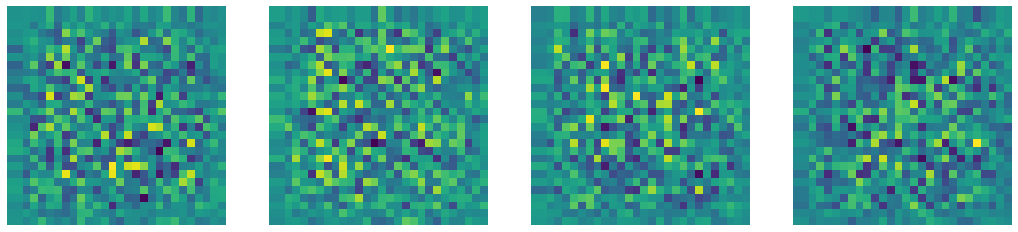

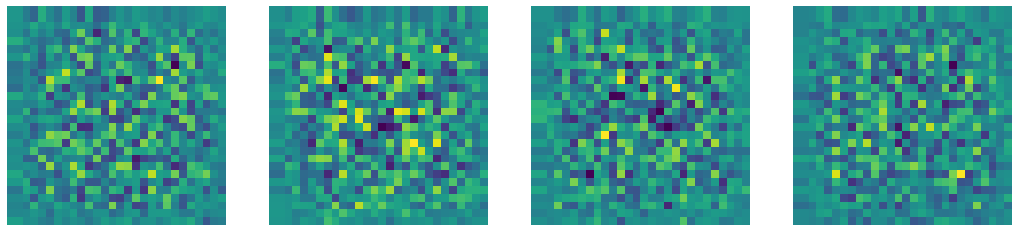

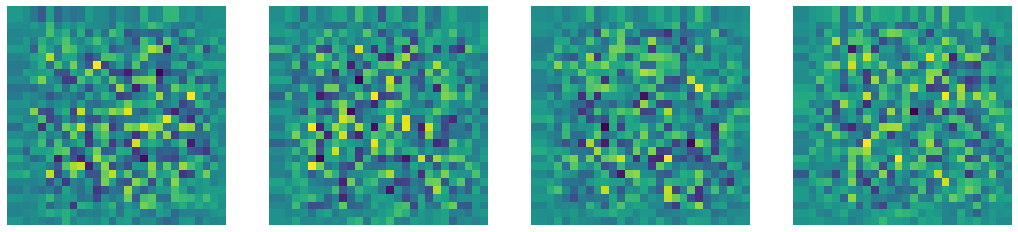

In [20]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img = img.to(device)
        x_bar, mu, sigma = model_vae(img)
        loss = loss_fun(img.data, x_bar.data, mu, sigma)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    if epoch % 5 == 0:
      display_images(None, x_bar)

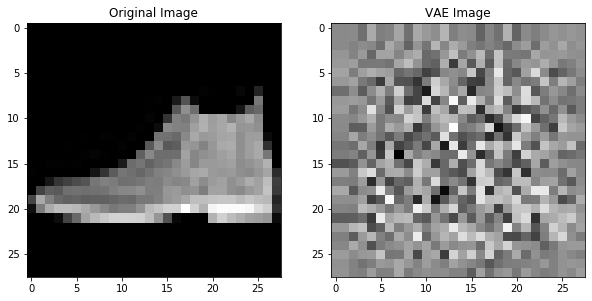

In [21]:
test_images, labels = next(iter(testloader))

test_images = test_images.to(device)

x_bar, mu, sigma = model_vae(test_images)

inp = test_images.view(-1, 28, 28)

out_conv = x_bar.reshape(-1, 28, 28)


fig = plt.figure(figsize=(10, 50), )
# fig.tight_layout(pad=10)

plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('VAE Image')
imgplot = plt.imshow(out_conv[0].cpu().detach(), cmap='gray')
plt.show()